In [49]:
# !pip install wordcloud

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

2(News): the tweet links to factual news about climate change

1(Pro): the tweet supports the belief of man-made climate change

0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1(Anti): the tweet does not believe in man-made climate change


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import string

import warnings
warnings.filterwarnings("ignore")

In [51]:
Tweets_df = pd.read_csv("twitter_sentiment_data.csv")

In [52]:
Tweets_df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [53]:
n_rows, _ = Tweets_df.shape

In [54]:
#Check for null
Tweets_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [55]:
Tweets_df_copy = Tweets_df.copy()

In [56]:
Tweets_df_copy.drop(columns=["tweetid"], inplace=True)

In [57]:
Tweets_df_copy.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [58]:
Tweets_df_copy.sentiment.unique()

array([-1,  1,  2,  0])

## Selecting 1000 rows for simplicity

In [59]:
data = Tweets_df_copy.iloc[0:1000,:]

In [60]:
data.shape

(1000, 2)

In [61]:
data.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [62]:
dist = data.sentiment.value_counts()

In [63]:
dist = pd.Series(dist)

<AxesSubplot:>

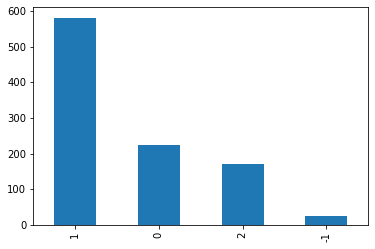

In [64]:
dist.plot(kind='bar')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1000 non-null   int64 
 1   message    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Word cloud generation - Factual Change , Belief of Change , No Comment and Non-Believer

In [66]:
from wordcloud import WordCloud
import re

In [67]:
tweet_list_Factual_Change = data[data.sentiment == 2]
tweet_list_Belief_of_Change = data[data.sentiment == 1]
tweet_list_Neutral = data[data.sentiment == 0]
tweet_list_Non_Believer = data[data.sentiment == -1]

In [68]:
"""letters_only_tweet_list_Factual_Change = re.sub("[^a-zA-Z]", " ", str(tweet_list_Factual_Change))
letters_only_tweet_list_Belief_of_Chang = re.sub("[^a-zA-Z]", " ", str(tweet_list_Belief_of_Change))
letters_only_tweet_list_Neutral = re.sub("[^a-zA-Z]", " ", str(tweet_list_Neutral))
letters_only_tweet_list_Non_Believer = re.sub("[^a-zA-Z]", " ", str(tweet_list_Non_Believer))"""

'letters_only_tweet_list_Factual_Change = re.sub("[^a-zA-Z]", " ", str(tweet_list_Factual_Change))\nletters_only_tweet_list_Belief_of_Chang = re.sub("[^a-zA-Z]", " ", str(tweet_list_Belief_of_Change))\nletters_only_tweet_list_Neutral = re.sub("[^a-zA-Z]", " ", str(tweet_list_Neutral))\nletters_only_tweet_list_Non_Believer = re.sub("[^a-zA-Z]", " ", str(tweet_list_Non_Believer))'

In [69]:
sentiment_tweet_group = [tweet_list_Factual_Change , tweet_list_Belief_of_Change, tweet_list_Neutral, tweet_list_Non_Believer]

In [70]:
#converting all tweet list groups into letter only for word cloud

for tweet_group_df in sentiment_tweet_group:
    tweet_group_df['letters_only'] = re.sub("[^a-zA-Z]", " ", str(tweet_group_df))


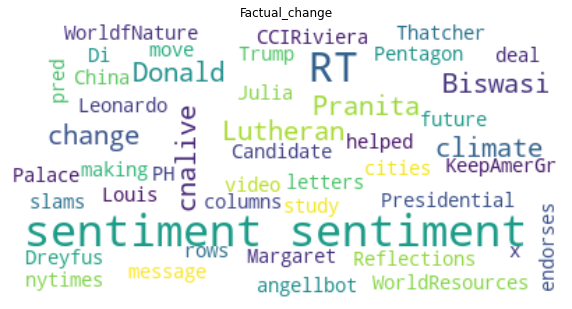

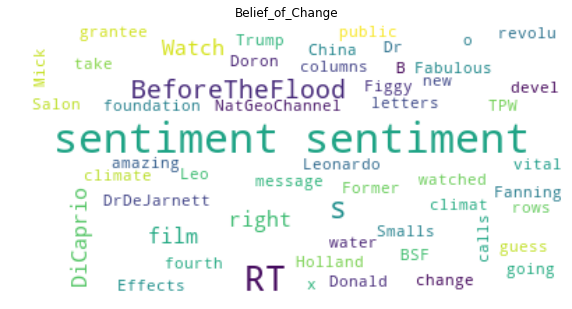

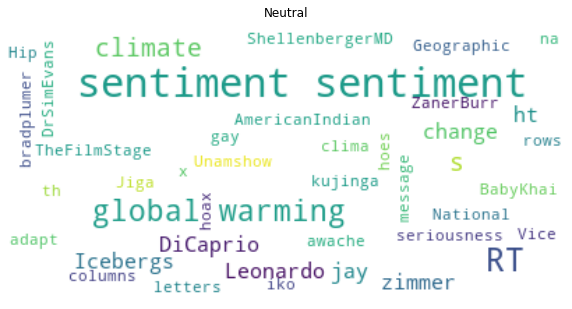

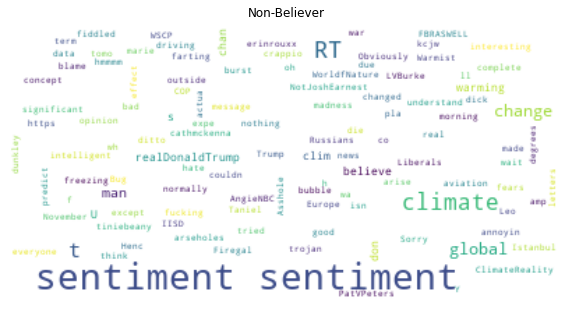

In [71]:
# Plot each word cloud
title_list = ['Factual_change','Belief_of_Change','Neutral','Non-Believer']

i = 0
for tweet_group_df in sentiment_tweet_group:
    wordcloud = WordCloud(background_color="white").generate(re.sub("[^a-zA-Z]", " ", str(tweet_group_df)))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_list[i])
    i = i+1
    plt.show()

In [72]:
X = pd.DataFrame(data.message)
y = pd.DataFrame(data.sentiment)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [74]:
combine = [X_train, X_test]

# Pre-Processing

In [75]:
#convert all strings to lower

for dataset in combine:
    dataset.message = dataset.message.str.lower()

In [76]:
#Word_Count

for dataset in combine:
    dataset['word_count']  = dataset['message'].apply(lambda x: len(str(x).split()))

#punctuation count

for dataset in combine:
    dataset['punctuation_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [77]:
import nltk
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
reduced_stopwords = \
['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", \
"you'd", 'your', 'yours', 'yourself', 'yourselves', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', \
'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',\
'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', \
'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',\
'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', \
'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', \
'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',\
'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', "don't", \
'should', "should've", 'now', 'couldn', \
"couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", \
'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', \
"needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [79]:
def remove_stop_words(text):
    for word in reduced_stopwords:
        text = text.replace(word, '')
    return text

for dataset in combine:
    dataset['message']  = dataset['message'].apply(remove_stop_words)

In [80]:
"""#Stop Word count - from nltk

STOPWORDS = stopwords.words('english')

for dataset in combine:
    dataset['stop_word_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c in STOPWORDS]))"""

"#Stop Word count - from nltk\n\nSTOPWORDS = stopwords.words('english')\n\nfor dataset in combine:\n    dataset['stop_word_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c in STOPWORDS]))"

In [81]:
# hashtag_count
for dataset in combine:
    dataset['hashtag_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c == '#']))

In [82]:
# mention_count
for dataset in combine:
    dataset['mention_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [83]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

for dataset in combine:
    dataset['message']  = dataset['message'].apply(remove_punctuations)

In [84]:
# mean_word_length

for dataset in combine:
    dataset['mean_word_length']  = dataset['message'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [85]:
X_train.head()

,message,word_count,punctuation_count,hashtag_count,mention_count,mean_word_length
154,tlwiese hillarycln realnaldtrump hes hot heade...,20,9,0,3,5.058824
715,rt leeva takg shter shs buyg reusable bottles...,21,5,0,1,5.062500
680,rt kephecom e terestg collabis f lear di ca...,21,8,0,1,4.312500
129,rt cop22 4 days bious clime change agreent ...,20,5,1,1,5.230769
760,rt rbreich im ten ld clime change a middlecl...,23,14,0,1,4.375000


In [86]:
X_test.head()

,message,word_count,punctuation_count,hashtag_count,mention_count,mean_word_length
204,rt laceygreve13 people deunce clime change l...,10,8,0,1,7.375000
71,rt explichooker leo co \nleo i t im busy\n f...,21,13,0,1,4.588235
594,r move cha cricizes trump plan ex clime chan...,15,7,0,1,5.384615
672,rt climeprogress brace yself f a bterly cold w...,18,12,0,1,5.937500
14,rt wldresces reflectis lear dicaprioã¢â‚¬â„¢s...,13,15,2,1,8.666667


Target - 7th Nov
- Build a basic model and maximize accuracy withe the given features

Target - Final
 - Explore more algorithms
 - Improve generalizability of the model.
 